# Evaluation examples

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%autoreload 2
simulation = Simulator(n_nodes = 25, n_edges = 35, n_clusters = 5, seed = 12343, sample_size = 100)
cluster_dag = simulation.run()

2023-07-27 14:46:27,740 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [3]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X1'], 'C2': ['X4', 'X15', 'X6'], 'C3': ['X7', 'X11', 'X12', 'X19', 'X23', 'X2', 'X5', 'X16', 'X18', 'X8', 'X9', 'X10'], 'C4': ['X20', 'X21', 'X24', 'X25'], 'C5': ['X13', 'X14', 'X17', 'X3', 'X22']}
[('C1', 'C3'), ('C2', 'C3'), ('C3', 'C5'), ('C2', 'C5'), ('C3', 'C4'), ('C2', 'C4'), ('C4', 'C5')]


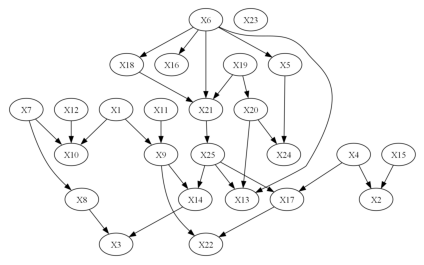

In [4]:
cluster_dag.true_dag.draw_pydot_graph()

In [5]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

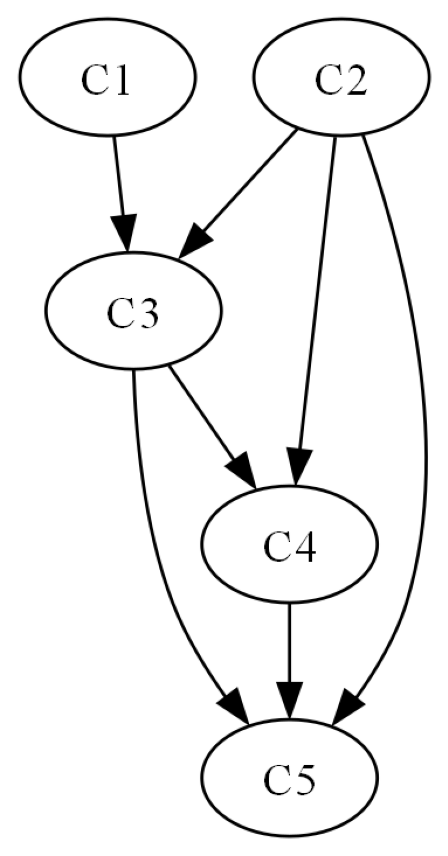

In [6]:
cluster_dag.draw_cluster_graph()

In [7]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()

Topological ordering['C1', 'C2', 'C3', 'C4', 'C5']


Intra: C5    , Depth=2, working on node 21: 100%|██████████| 5/5 [00:00<00:00, 454.79it/s, duration: 0.03sec]


Duration of algorithm was 115.56754851341248sec


In [23]:
print(cluster_dag.cluster_mapping.keys())

dict_keys(['C1', 'C2'])


In [22]:
print(cluster_dag.cluster_mapping['C2'])
print(cluster_dag.cluster_mapping['C4'])

['X5', 'X2', 'X4']


KeyError: 'C4'

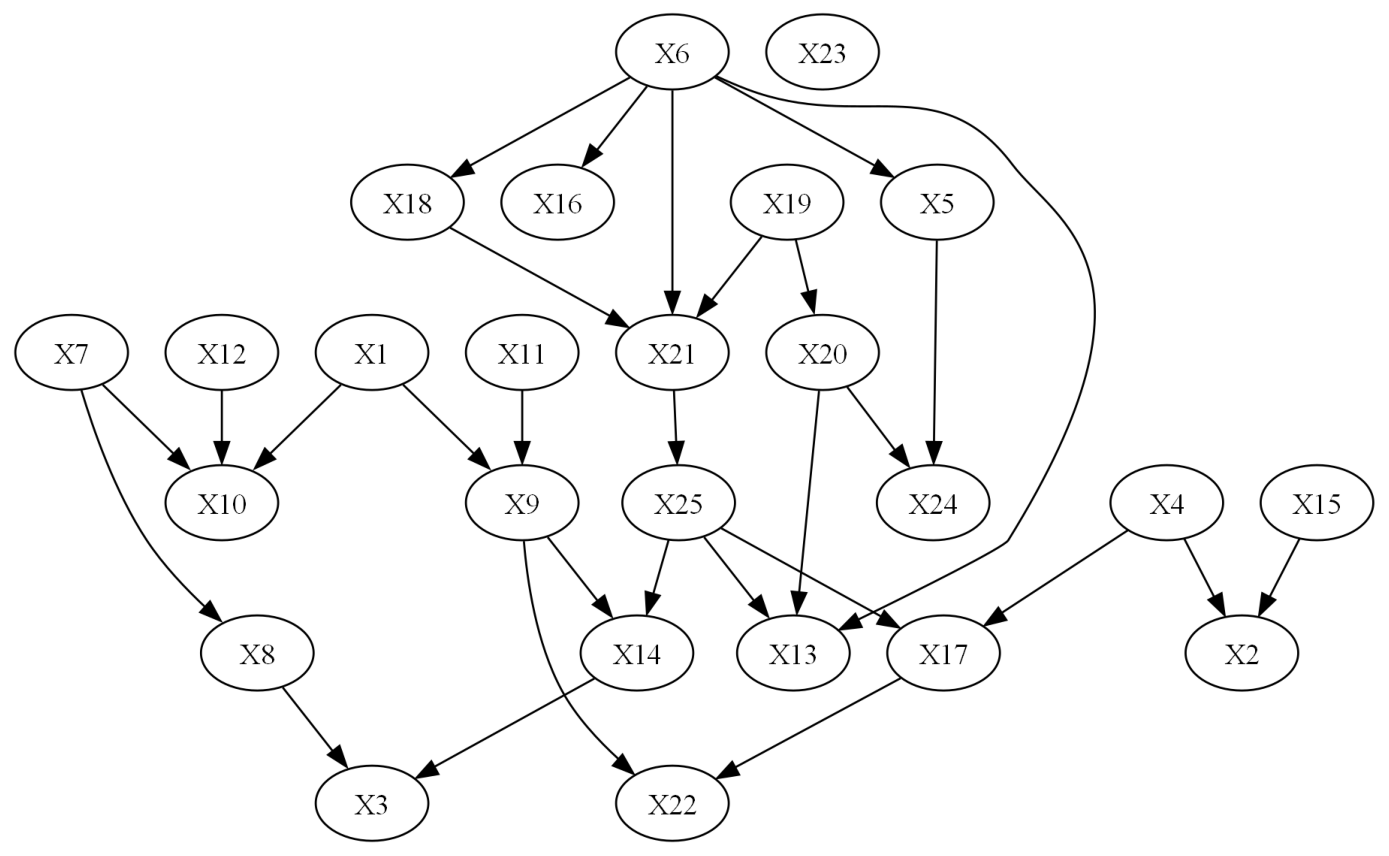

In [8]:
cluster_dag.true_dag.draw_pydot_graph()

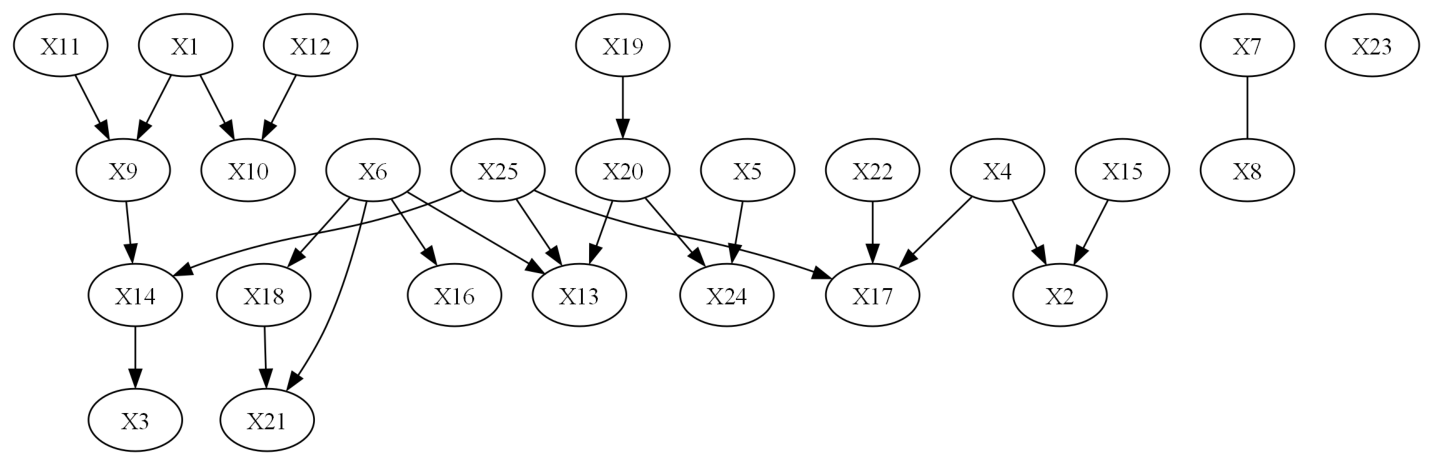

In [9]:
est_graph.draw_pydot_graph()

In [10]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 23, 'false_positive': 0, 'false_negative': 6, 'true_negative': 271, 'precision': 1.0, 'recall': 0.7931034482758621}
Arrow confusion:  {'true_positive': 21.0, 'false_positive': 1.0, 'false_negative': 8.0, 'true_negative': 595.0, 'precision': 0.9545454545454546, 'recall': 0.7241379310344828, 'true_positive_ce': 21.0, 'false_positive_ce': 1.0, 'false_negative_ce': 2.0, 'true_negative_ce': 601.0, 'precision_ce': 0.9545454545454546, 'recall_ce': 0.9130434782608695}
SHD:  7


In [11]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(cluster_dag.data, alpha = 0.05, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
adjacency_confusion, arrow_confusion, shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Depth=2, working on node 24: 100%|██████████| 25/25 [00:00<00:00, 711.99it/s] 


Adjacency confusion:  {'true_positive': 21, 'false_positive': 0, 'false_negative': 8, 'true_negative': 271, 'precision': 1.0, 'recall': 0.7241379310344828}
Arrow confusion:  {'true_positive': 13.0, 'false_positive': 3.0, 'false_negative': 16.0, 'true_negative': 593.0, 'precision': 0.8125, 'recall': 0.4482758620689655, 'true_positive_ce': 13.0, 'false_positive_ce': 3.0, 'false_negative_ce': 8.0, 'true_negative_ce': 601.0, 'precision_ce': 0.8125, 'recall_ce': 0.6190476190476191}
SHD:  11
